In [1]:
import numpy as np
import gdal
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
# read all band images in a directory
images = {}
image_dir = 'earthengine_images/'
for fn in os.listdir(image_dir):
    raw = gdal.Open(image_dir + fn)
    arr = raw.ReadAsArray()
    images[fn.split('.')[0]] = arr

In [3]:
for k, v in images.items():
    print(k + ' ' + str(v.shape))

LC80940862015047 (3, 117, 311)
LC80930862015088 (3, 117, 311)
LC80940862015079 (3, 117, 311)
LC80930862015040 (3, 117, 311)
LC80930862015056 (3, 117, 311)
LC80930862015072 (3, 117, 311)


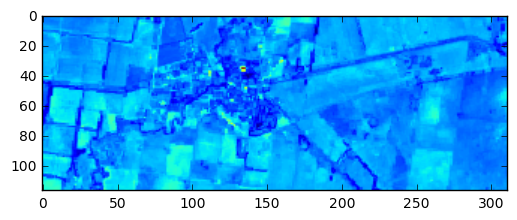

In [4]:
plt.imshow(images['LC80930862015040'][2, :, :])
plt.show()

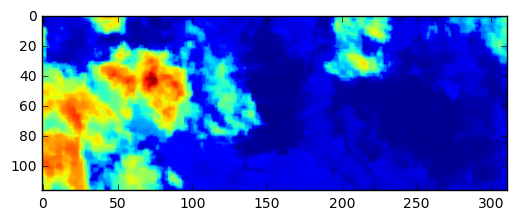

In [5]:
plt.imshow(images['LC80940862015079'][2, :, :])
plt.show()

In [6]:
# read all mask images in a directory
masks = {}
mask_dir = 'earthengine_masks/'
for fn in os.listdir(mask_dir):
    raw = gdal.Open(mask_dir + fn)
    arr = raw.ReadAsArray()
    masks[fn.split('.')[0]] = arr

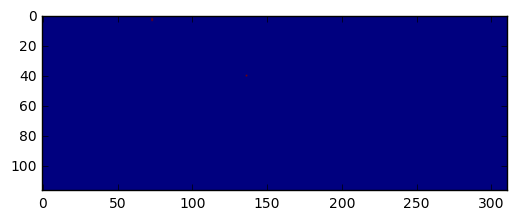

In [7]:
plt.imshow(masks['LC80930862015040'][0, :, :])
plt.show()

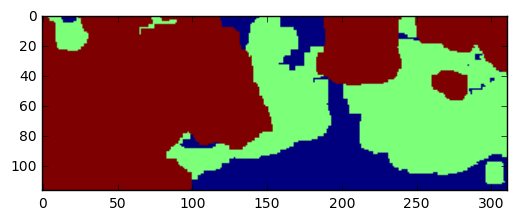

In [8]:
plt.imshow(masks['LC80940862015079'][0, :, :])
plt.show()

In [9]:
# compose band and mask images into one image
combined = {}
image_dir = 'earthengine_images/'
mask_dir = 'earthengine_masks/'
for fn in os.listdir(image_dir):
    raw_img = gdal.Open(image_dir + fn)
    arr_img = raw_img.ReadAsArray()
    raw_msk = gdal.Open(mask_dir + fn)
    arr_msk = raw_msk.ReadAsArray()
    combined[fn.split('.')[0]] = np.concatenate((arr_img, arr_msk), axis=0)

In [10]:
print(combined['LC80940862015079'].shape)

(5, 117, 311)


In [11]:
# use image names to look up metadata from csv export
table = pd.read_csv('earthengine_tables/LC8_SR.csv')
time_start = table[['system:index', 'system:time_start']]

In [65]:
time_start

,system:index,system:time_start
0,LC80930862015040,1423440571231
1,LC80930862015056,1424822966175
2,LC80930862015072,1426205354132
3,LC80930862015088,1427587746370
4,LC80940862015047,1424045737534
5,LC80940862015079,1426810523472


In [13]:
time_start[time_start['system:index'] == 'LC80930862015040'].ix[0, 1]

1423440571231

In [14]:
# compose all data into a single data frame
ds = {}
for k, v in combined.items():
    ts = time_start[time_start['system:index'] == k]['system:time_start'].iloc[0]
    ds[ts] = v

In [15]:
print(ds.keys())

dict_keys([1426810523472, 1427587746370, 1426205354132, 1423440571231, 1424045737534, 1424822966175])


In [ ]:
# getting ready for interpolation / training

In [63]:
# get time series at a point
def getTS(data, x, y):
    times = list(data.keys())
    times.sort()
    ts = dict(map(lambda t: (t, data[t][:, x, y]), times))
    df = pd.DataFrame(ts)
    return df

In [116]:
df = getTS(ds, 100, 200)
df

,1423440571231,1424045737534,1424822966175,1426205354132,1426810523472,1427587746370
0,2144,6346,3669,4851,2600,2127
1,1132,5719,1906,4176,1298,1048
2,801,5458,1363,3989,916,745
3,0,4,4,4,0,0
4,1,3,1,3,1,1


cfmask: cloud mask.

    0=clear
    1=water
    2=shadow
    3=snow
    4=cloud

cfmask_conf: cloud mask confidence

    0=none
    1=cloud confidence ≤ 12.5%
    2=cloud confidence > 12.5% and ≤ 22.5%
    3=cloud confidence > 22.5%

In [117]:
def selectClear(df, level=1):
    return df.ix[:, (df.ix[3, :] == 0) & (df.ix[4, :] <= level)]

In [118]:
selectClear(df, 1)

,1423440571231,1426810523472,1427587746370
0,2144,2600,2127
1,1132,1298,1048
2,801,916,745
3,0,0,0
4,1,1,1


In [ ]:
# collect more data points and run interpolation

In [ ]:
# analyse periodicity etc.

In [ ]:
# consider getting info from nearby points